In [15]:
from IPython.core.display import display, HTML, Markdown
import networkx as nx
import copy
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (10,7)


In [55]:
def evaluation_format(answ, pt_green,pt_red):
    pt_blue=0
    if pt_green!=0:
        pt_blue=pt_red-pt_green
        pt_red=0
    return f"{answ}. Totalizzeresti <span style='color:green'>[{pt_green} safe pt]</span>, \
                                    <span style='color:blue'>[{pt_blue} possible pt]</span>, \
                                    <span style='color:red'>[{pt_red} out of reach pt]</span>.<br>"

def Latex_type(string):
    return string.replace("_", "\_")

def visualizza(grafo):
    #layout grafo
    pos=nx.planar_layout(grafo)
    #pos=nx.spring_layout(grafo)
    #disegna nodi e etichette sui nodi
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    #nx.draw_networkx_edges(grafo, pos)
    #labels = nx.get_edge_attributes(grafo,'w')
    #nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    plt.show()
    
def visualizza_icosaedro(grafo):
    front_face = [15, 16, 17, 18, 19]
    back_face = [0, 1, 2, 3, 4]
    middle = list(set(range(20)).difference(front_face + back_face))
    shells = [front_face] + [middle] + [back_face]
    pos = nx.shell_layout(grafo, shells)
    #nx.draw_networkx(icosaedro, pos)
    nx.draw_networkx_nodes(grafo, pos, alpha=0.6) #node_color='cyan',
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    positive=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] >= 0]
    negative=[(u,v) for (u,v,d) in grafo.edges(data=True) if d['w'] < 0]
    
    
    nx.draw_networkx_edges(grafo,pos,edgelist=positive,width=2,alpha = 0.6,edge_color = "g",arrows=True)
    nx.draw_networkx_edges(grafo,pos,edgelist=negative,width=2,alpha = 0.6,edge_color = "r",arrows=True)
    
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.set_axis_off()
    
def verifica_ciclo_negativo(grafo,node_list, return_only_boolan=False):
    n=len(node_list)
    check = 0
    try:
        for i in range(1,n):
            check = check + grafo[node_list[i-1]][node_list[i]]['w']
        check = check + grafo[node_list[n-1]][node_list[0]]['w']
        if check < 0:
            if return_only_boolan:
                return True
            return  evaluation_format("Si", 10, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito contiene un ciclo negativo."
        else:
            if return_only_boolan:
                return False
            evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito NON contiene un ciclo negativo."
    except:
        if return_only_boolan:
            return False
        return evaluation_format("No", 0, 10)+f"La sequenza di nodi $node\_list={node_list}$ che hai fornito non forma un ciclo nel grafo"
    
def verifica_presenza_solo_cicli_positivi(grafo, pesi_nodi, return_only_boolan=False):
    if len(pesi_nodi)!=len(grafo.nodes):
        if return_only_boolan:
            return False
        return evaluation_format("No", 0, 10)+f"La lista che hai fornito dà un peso a ${len(pesi_nodi)}$ nodi, mentre i nodi nel grafo sono ${len(grafo.nodes)}$"
    G=copy.deepcopy(grafo)
    for (u,v) in G.edges:
        G[u][v]['w'] = G[u][v]['w'] - pesi_nodi[v] + pesi_nodi[u]
    visualizza(G)
    for (u,v) in G.edges:
        if G[u][v]['w'] < 0:
            if return_only_boolan:
                return False
            return evaluation_format("No", 0, 10)+f"Come vedi dal grafo $G'$ sopra rappresentato, ricavato da $G$ con i valori da te inseriti, compare ancora un ciclo negativo"
    if return_only_boolan:
        return True
    return evaluation_format("SI", 10, 10)+f"Come vedi dal grafo $G'$ sopra rappresentato, ricavato da $G$ con i valori da te inseriti, mi hai dimostrato che in $G$ non sono presenti cicli negativi"

In [41]:
#grafo ciclo negativo
nodes=[0,1,2,3]
edges=[(0,2,{'w': 1}),(2,1,{'w': 1}),(2,3,{'w': 2}),(1,0,{'w': -5}),(1,3,{'w': 1})]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#grafo senza cicli negativi
nodes=[0,1,2,3]
edges=[(0,2,{'w': -1}),(2,1,{'w': -1}),(2,3,{'w': 2}),(1,0,{'w': 4}),(1,3,{'w': 1})]
H = nx.DiGraph()
H.add_nodes_from(nodes)
H.add_edges_from(edges)

#test icosaedro
nodes=[(0+i) for i in range(20)]
edges=[
        (0,1,{'w': -7}), #1,0 freccia al contrario
        (1,2,{'w': 1}),
        (2,3,{'w': 2}),
        (0,4,{'w': -5}),
        (4,3,{'w': 9}),
        (5,0,{'w': 3}),
        (1,7,{'w': 7}),
        (2,9,{'w': 5}),
        (11,3,{'w': -1}),
        (13,4,{'w': 11}),
        (14,13,{'w': 8}),
        (13,12,{'w': 6}),
        (11,12,{'w': -2}),
        (10,11,{'w': -7}),
        (9,10,{'w': -17}),
        (8,9,{'w': 12}),
        (8,7,{'w': 19}),
        (6,7,{'w': 3}),
        (14,5,{'w': -9}),
        (5,6,{'w': -1}),
        (6,15,{'w': -1}),
        (16,8,{'w': -1}),
        (2,3,{'w': 7}),
        (10,17,{'w': -5}),
        (12,18,{'w': 11}),
        (19,14,{'w': 18}),
        (17,16,{'w': -9}),
        (16,15,{'w': 10}),
        (19,15,{'w': 1}),
        (18,19,{'w': 19}),
        (18,17,{'w': -23})
        
        ]
icosaedro=nx.DiGraph()
icosaedro.add_nodes_from(nodes)
icosaedro.add_edges_from(edges)

## Esercizio \[60 pts\]
(CICLI) Riconosci cicli se in un grafo è presente un ciclo negativo oppure forniscimi la prova che nel grafo non vi sono cicli negativi

Dato il seguente grafo orientato G=(|V|=n,|E|=m) con i nodi etichettati da 0 a n-1 e gli archi pesati, rispondi alle seguenti domande.

G=(V,E)

V=[0, 1, 2, 3]

E=[(0, 2, {'w': 1}), (1, 0, {'w': -5}), (1, 3, {'w': 1}), (2, 1, {'w': 1}), (2, 3, {'w': 2})]

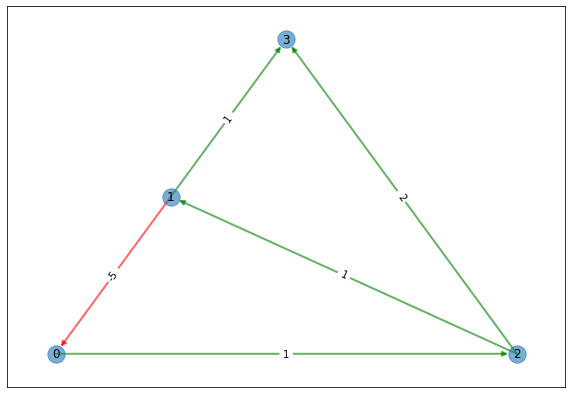

In [42]:
# Ecco il grafo in input:
display(Markdown(f"G=(V,E)"))
display(Markdown(f"V={G.nodes}"))
display(Markdown(f"E={G.edges.data()}"))
visualizza(G)

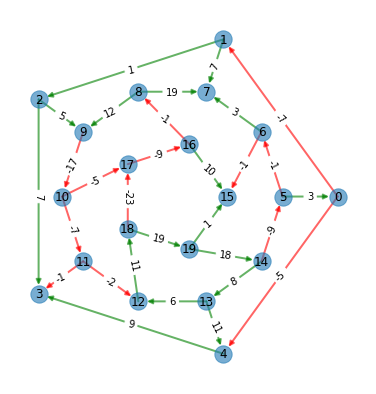

In [52]:
visualizza_icosaedro(icosaedro)

__Richieste__:

1. Forniscimi una lista di vertici che formano un ciclo negativo (rispetta la direzione degli archi)

In [56]:
# Certificato di si, HA CICLI NEGATIVI
# fornisci sottosequenza di archi

ciclo_neg=[8,9,10,17,16]
display(Markdown(verifica_ciclo_negativo(icosaedro,ciclo_neg)))

Si. Totalizzeresti <span style='color:green'>[10 safe pt]</span>,                                     <span style='color:blue'>[0 possible pt]</span>,                                     <span style='color:red'>[0 out of reach pt]</span>.<br>La sequenza di nodi $node\_list=[8, 9, 10, 17, 16]$ che hai fornito contiene un ciclo negativo.

2.Forniscimi un certificato che nel grafo G non esista un ciclo negativo.
  Per fare questo forniscimi una lista con i pesi da dare ai nodi (da 0 a n-1) in modo che il grafo G' derivato     dal grafo G applicando i pesi sui nodi dimostri la presenza di soli cicli positivi.

In [ ]:
# Certificato di no, fornire peso che fa si che tutti gli archi abbiano un peso positivo
# i nodi vanno da 1 a n-1, mettimi il valore da sommare per far si di farmi vedere che tutti i cicli sono positivi

pesi_nodi=[12,8,10,0]
display(Markdown(verifica_presenza_solo_cicli_positivi(H,pesi_nodi)))